# DS 3000 HW 5 

Due: Sunday July 20th @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file and the a `PDF` file included with the coding results to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted files represent your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the files to gradescope. 

**Notice that this is a group assignment. Each group only need to submit one copy and when you submit the work, please include everyone in your group.**

### Tips for success
- Start early
- Make use of Piazza
- Make use of Office hour
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (not show each other) the problems.

## Project proposal

For this course, we aim to complete a data analysis project about the the game [Palworld](https://en.wikipedia.org/wiki/Palworld). To help you start with the project, here are a couple of things you need to consider and work on to get a clean data for later analysis. 

To start with the project, please take some time to get familiar with the game. You don't need to play it but please at least know the basic terminologies, like what is a Pal. (And also, if you do play it, please do not spend too much time on it.)

The two recommended database is [https://palworld.gg/](https://palworld.gg/) and [https://paldb.cc/en/](https://paldb.cc/en/). You can use either, or both, or some other database about the Palworld. 

### Part 1.1 (10 points)

Please list 2-3 questions you may be interested to study with the Palworld database. It can be anything related in the game, like the Pals, items or constructions. Some potential question structures can be: 
- Are `A` and `B` related? How they are related?
- Which features may affect `C`'s change?
- If I need a higher `D`, which features may have a lower/higher value?
- Based on `E` and `F`, which items/pals are similar?
- I need to predict the value for `G`, which features I need to consider?

#### Part 1.1 Solution

1. Which of the Pal's stats best predict the rarity of the Pal/which Pal is the best in each rarity group?
   - Regression + Scatterplot

   
3. Is there a correlation between Pal work suitability and Pal element? How are they related?

   
5. What is the value of a weapon item? What is the correlation between physical attack and price? Durability and price?
   -

### Part 1.2 (20 points)

Based on the questions we proposed in the part 1.1, what features we may need to include in the analysis? Check the websites, which website has those information? **You need to pick at least 8 features for analysis.** We recommend a mix of numerical (numbers etc.) and categorical (level etc.) features. Is there any other features that you think it may be important but hard to extract or find on the website (can be something in or not in the game)?

#### Part 1.2 Solution

The eight features selected for analysis are Pal stats, Pal rarity, Pal element, Pal work suitability, item price, item durability, item weight, and item physical attack. The numerical features are Pal stats, item price, item durability, item weight, and item physical attack. Work suitability could technically also be considered numerical (there is a categorical and numerical aspect to this feature).

### Part 1.3 (20 points)

Suppose you do have all the features you mentioned in part 1.2. List 3-4 data visulizations you can make with those features. You do not need to make those visulizations here. Just describe the type of the visualizations (histogram, scatter plot etc. ), which features are involved, will there any hover data or color being added, and **discuss how these data visualizations may be related (or even answer) to your questions in part 1.1**. 

#### Part 1.3 Solution

Which of the Pal's stats best predict the rarity of the Pal/which Pal is the best in each rarity group?
  1) A scatterplot where the x-axis is one of the Pal's stats or a combined number representing all of the stats and the y-axis is the Pal's rarity
  2) A scatterplot where color represents the rarity and the x-axis and y-axis are two different stats that I can pull like attack and defense
  Both of these visualizations allow us to see the relationship between various Pal stats and a Pal's rarity, and will provide insight into the predictive power of certain stats vs. others.

Is there a correlation between Pal work suitability and Pal element? How are they related?
  1) A heatmap which contains work suitabilities on the x-axis and elements on the y-axis. The shade of the heatmap will be dependent on the numerical average of a particular work suitability for Pal's with a particular element.
  The heatmap will reveal insight into whether there are certain work suitabilities associated with certain elements. Using this heatmap, we could then visualize the relationship between a certain work suitability and certain element which have a darker shading (higher numerical average of work suitability), to see if there is an actual relationship.

What is the value of a weapon item? What is the correlation between physical attack and price? Durability and price?
  1) A scatter plot where the x-axis represents the physical attack value and the y-axis represents the item price. Each point on the plot will correspond to an individual item. 
  This visualization is designed to reveal whether items with higher attack values tend to be more expensive, allowing us to examine pricing trends and identify any correlations or outliers. This analysis directly supports our research question about item value.

### Part 1.4  (50 points)

Now, go ahead and try to scrape the features you need. 

Please show all the codes you have for web scrapping. Your current output data frame should include at least 4 features. (You do not need to scrape all features at this moment, although it is recommend to start earlier. Also, you can choose to not to use the ones you have scraped in the later analysis. No need to worry if you need to change anything later). **Please design your code in pipeline and clearly document each function.** See the Python Style Guide in Week 1 for proper documentation. It is also recommended to save the data you have scrapped. 

#### Part 1.4 Solution - Functions to extract Pal dataframe

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
import pylab as py
import scipy.stats as stats
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:


def get_html(url):
    """
    Retrieve HTML content from a given URL

    Args:
        url (str): The webpage URL to fetch HTML from

    Returns:
        str: HTML content as a string.
    """
    response = requests.get(url)
    return response.text

In [12]:
def extract_pal_links(html):
    """
    Extracts and returns a list of links to pals from the HTML soup object.
    
    Args:
        html (string): html text of a webpage
        
    Returns:
        pal_links (list): A list of full URLs to individual pal pages.
    """
    # parse HTML content to create soup
    soup = BeautifulSoup(html)
    
    pal_links = []  # Create an empty list to store full URLs

    # Find all <div> elements with class pal
    for pal_div in soup.find_all('div', class_='pal'):
        
        # Inside each <div class='pal'>, find the first <a> tag
        a_tag = pal_div.find('a')
        
        # Check if the <a> tag exists and has an 'href' attribute
        if a_tag and a_tag.has_attr('href'):
            # Build the full link by appending the relative path to the base URL
            full_link = 'https://palworld.gg' + a_tag['href']
            pal_links.append(full_link)

    return pal_links

In [5]:
def fetch_pal_data(pal_links):
    """
    Given a list of Palworld page links, fetch each page and extract the pal's name and stats.

    Args:
        pal_links (list): A list of full URLs to individual pal pages.

    Returns:
        pal_data (dictionary): dictionary containing a pal's name, link, and stats.
    """    
    name, href, stats = [], [], []

    for link in pal_links:
        # Request the HTML content of each pal's page
        response = requests.get(link)
        if response.status_code != 200:
            continue

        # Parse the HTML using BeautifulSoup
        pal_soup = BeautifulSoup(response.text, 'html.parser')

        # Get the pal's name from the <h1> tag
        name_tag = pal_soup.find('h1')
        pal_name = name_tag.text.strip() if name_tag else 'Unknown'

        # Dictionary to store stats like HP, Attack, etc.
        stats_dict = {}

        # Look for the section containing stats
        stats_div = pal_soup.find('div', class_='stats')
        if stats_div:
            items_div = stats_div.find('div', class_='items')
            if items_div:
                # Loop through all stat items
                for item in items_div.find_all('div', class_='item'):
                    stat_name_tag = item.find('div', class_='name')
                    stat_value_tag = item.find('div', class_='value')
                    if stat_name_tag and stat_value_tag:
                        stat_name = stat_name_tag.text.strip()
                        stat_value = stat_value_tag.text.strip()
                        stats_dict[stat_name] = stat_value

        # Save the collected data into corresponding lists
        name.append(pal_name)
        href.append(link)
        stats.append(stats_dict)
        
    pal_data = {'Name': name, 'Link': href, 'Stats': stats}


    return pal_data

In [42]:
def add_rarity_info(pal_data):
    """
    Adds rarity_level and rarity_name to each pal dictionary
    
    Args:
        pal_data (dictionary): contains pal info with at least a 'Link' key.
        
    Returns:
        pal_data (dictionary): 'Rarity Level' and 'Rarity Name' fields added
    """
    # empty lists to store rarity level and rarity name
    rar_level, rar_name = [], []
    
    for link in pal_data['Link']:
        html = get_html(link)  # FIXED: now using each Pal's page
        soup = BeautifulSoup(html, 'html.parser')

        # Find the rarity div
        rarity_div = soup.find('div', class_='rarity')
        rarity_level, rarity_name = None, None
        if rarity_div:
            lv_tag = rarity_div.find('div', class_='lv')
            name_tag = rarity_div.find('div', class_='name')
            if lv_tag and name_tag:
                rarity_level = lv_tag.text.strip()
                rarity_name = name_tag.text.strip()

        rar_level.append(rarity_level)
        rar_name.append(rarity_name)
        
    pal_data['Rarity Level'] = rar_level
    pal_data['Rarity Name'] = rar_name

    return pal_data

In [43]:
def add_element_work(pal_data):
    """
    Adds element and work suitability to pal_data
    
    Args:
        pal_data (dictionary): Dictionary, with at least a 'Link' key.
        
    Returns:
        pal_data (dictionary): 'Element', 'Work Suitability' added
    
    """
    # empty lists to store element and work suitability
    element, work = [], []
    
    # iterate through all links
    for link in pal_data['Link']:
        
        # get HTML
        html = get_html(link)
        # Parse the HTML content
        soup = BeautifulSoup(html)
        
        # to store all elements of each pal
        pal_element = []
        
        # get contents of first div with class elements
        elements_div = soup.find('div', class_='elements')

        # get text from each element and append to pal_element
        for el in elements_div.find_all('div', class_='name'):
                    element_text = el.text.strip()
                    pal_element.append(element_text)
        
        # empty dict to store work suitability and level
        work_level = {}

        # get contents of first div with class works
        works_div = soup.find('div', class_='works')

        # iterates through contents of work_div with div and class item
        for item in works_div.find_all('div', class_='item'):
            
            # only extracts displayed items
            if 'display:none' not in item.get('style', ''):
                if 'Lv' in item.text:
                    work_suit, level = item.text.split('Lv')
                    work_level[work_suit] = int(level)
                else:
                    work_suit = item.text.strip()
                    work_level[work_suit] = ''
        
        # appends pal_element and work_level to the larger element and work lists
        element.append(pal_element)
        work.append(work_level)
    
    # adds to dictionary
    pal_data['Element'] = element
    pal_data['Work Suitability'] = work
    
    return pal_data

In [46]:
url = 'https://palworld.gg/pals'
html = get_html(url)
pal_links = extract_pal_links(html)

pal_data = fetch_pal_data(pal_links)

In [47]:
pal_data = add_rarity_info(pal_data)

In [17]:
pal_data = add_element_work(pal_data)

In [49]:
pd.DataFrame(pal_data)


,Name,Link,Stats,Rarity Level,Rarity Name
0,Anubis,https://palworld.gg/pal/anubis,"{'HP': '120', 'Defense': '100', 'Crafting Spee...",10,Epic
1,Arsox,https://palworld.gg/pal/arsox,"{'HP': '85', 'Defense': '95', 'Crafting Speed'...",4,Common
2,Astegon,https://palworld.gg/pal/astegon,"{'HP': '100', 'Defense': '125', 'Crafting Spee...",9,Epic
3,Azurmane,https://palworld.gg/pal/azurmane,"{'HP': '130', 'Defense': '110', 'Crafting Spee...",7,Rare
4,Azurobe,https://palworld.gg/pal/azurobe,"{'HP': '110', 'Defense': '100', 'Crafting Spee...",7,Rare
...,...,...,...,...,...
220,Wumpo Botan,https://palworld.gg/pal/wumpo-botan,"{'HP': '140', 'Defense': '110', 'Crafting Spee...",8,Epic
221,Xenogard,https://palworld.gg/pal/xenogard,"{'HP': '110', 'Defense': '130', 'Crafting Spee...",9,Epic
222,Xenolord,https://palworld.gg/pal/xenolord,"{'HP': '130', 'Defense': '120', 'Crafting Spee...",8,Epic
223,Xenovader,https://palworld.gg/pal/xenovader,"{'HP': '90', 'Defense': '85', 'Crafting Speed'...",7,Rare


# Xaviers Code

In [50]:
import pandas as pd
import numpy as np

# pal_data assumed available
df = pd.DataFrame(pal_data)

# Expand the dict in "Stats" to columns
stats_df = df["Stats"].apply(pd.Series)

# Merge back and coerce numbers
df = pd.concat([df.drop(columns=["Stats"]), stats_df], axis=1)

# Convert stat columns and rarity to numeric
stat_cols = stats_df.columns.tolist()
for c in stat_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")
df["Rarity Level"] = pd.to_numeric(df["Rarity Level"], errors="coerce")

# Optional combined metric
df["Total Stats"] = df[stat_cols].sum(axis=1)

# Drop rows missing target
df = df.dropna(subset=["Rarity Level"])

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

Xcols = stat_cols  # or stat_cols + ["Total Stats"] if you want to include the sum too

single_results = []
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for col in Xcols:
    X = df[[col]].values
    y = df["Rarity Level"].values
    # cross-validated R^2
    r2_scores = cross_val_score(LinearRegression(), X, y, scoring="r2", cv=cv)
    single_results.append({
        "Stat": col,
        "CV_R2_mean": np.mean(r2_scores),
        "CV_R2_std": np.std(r2_scores)
    })

single_results_df = pd.DataFrame(single_results).sort_values("CV_R2_mean", ascending=False)
print(single_results_df)

               Stat  CV_R2_mean  CV_R2_std
4       Shot Attack    0.472116   0.231242
0                HP    0.423798   0.188934
1           Defense    0.411825   0.079554
9   Sprinting Speed    0.338804   0.162892
5             Price    0.247629   0.272991
6           Stamina    0.230263   0.205116
10  Slow Walk Speed    0.173103   0.137280
8     Running Speed    0.160392   0.446896
3      Melee Attack    0.035244   0.024593
7           Support   -0.004442   0.032105
2    Crafting Speed   -0.025814   0.013832


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X = df[stat_cols].copy()
y = df["Rarity Level"].values

# Train/test for a clean holdout evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Numeric pipeline
num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

pre = ColumnTransformer([
    ("num", num_pipe, stat_cols)
])

reg_pipe = Pipeline(steps=[
    ("pre", pre),
    ("reg", LinearRegression())
])

reg_pipe.fit(X_train, y_train)
y_pred = reg_pipe.predict(X_test)
print("Holdout R^2:", r2_score(y_test, y_pred))

Holdout R^2: 0.7104344792971282


In [53]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor

# Permutation importance on the linear model
perm = permutation_importance(reg_pipe, X_test, y_test, n_repeats=30, random_state=42)
perm_importance = pd.DataFrame({
    "feature": stat_cols,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)
print(perm_importance)

# RandomForestRegressor feature importance
rf = Pipeline(steps=[
    ("pre", pre),
    ("rf", RandomForestRegressor(n_estimators=800, random_state=42))
])
rf.fit(X_train, y_train)
rf_r2 = r2_score(y_test, rf.predict(X_test))
print("RF Holdout R^2:", rf_r2)

rf_feat_imp = pd.Series(rf.named_steps["rf"].feature_importances_, index=stat_cols)\
                .sort_values(ascending=False)
print(rf_feat_imp)

            feature  importance_mean  importance_std
4       Shot Attack         0.297345        0.055386
0                HP         0.059911        0.026504
1           Defense         0.036820        0.020013
5             Price         0.032866        0.014475
8     Running Speed         0.026849        0.019850
9   Sprinting Speed         0.019912        0.014093
3      Melee Attack         0.007326        0.012111
6           Stamina         0.004067        0.003452
10  Slow Walk Speed         0.001543        0.001007
2    Crafting Speed         0.000000        0.000000
7           Support        -0.001856        0.003612
RF Holdout R^2: 0.8312792373389072
Shot Attack        0.446220
Price              0.335866
HP                 0.101979
Sprinting Speed    0.032997
Defense            0.030881
Running Speed      0.021840
Slow Walk Speed    0.015468
Melee Attack       0.006914
Stamina            0.006421
Support            0.001414
Crafting Speed     0.000000
dtype: float64


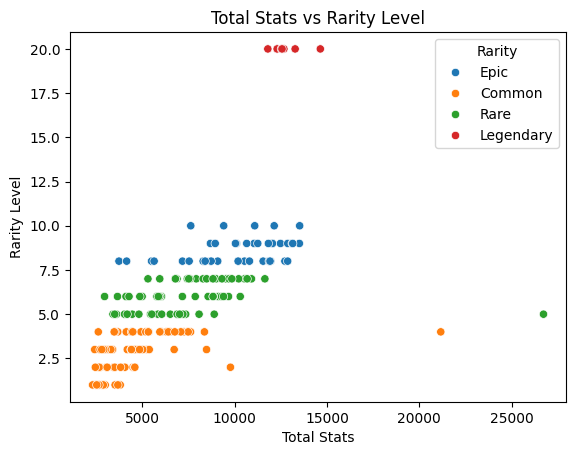

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x="Total Stats", y="Rarity Level", hue="Rarity Name")
plt.title("Total Stats vs Rarity Level")
plt.xlabel("Total Stats")
plt.ylabel("Rarity Level")
plt.legend(title="Rarity")
plt.show()